In [17]:
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## ***`RESIZE IMAGES`***

In [ ]:
!unzip  "/workplace/OpticalRemoteSensingClassification/ShipRSImageNet_V1_resized.zip" -d paired_dataset

Streaming output truncated to the last 5000 lines.
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001129.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001133.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001134.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001135.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001136.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001139.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001140.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001141.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001142.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001143.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001144.bmp  
  inflating: paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy/001146.bmp  
  inflating: paired_datas

In [21]:
# resize more as it will reduce training time
from PIL import Image
import os
desired_size = (256, 256)
for filename in os.listdir('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudless'):
      img = Image.open(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudless', filename))
      old_size = img.size
      new_size = desired_size
      new_img = img.resize(new_size)
      new_img.save(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudless', filename))

In [22]:
for filename in os.listdir('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy'):
      img = Image.open(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy', filename))
      old_size = img.size
      new_size = desired_size
      new_img = img.resize(new_size)
      new_img.save(os.path.join('/content/paired_dataset/ShipRSImageNet_V1/VOC_Format/cloudy', filename))

# ***Saving generated images***

STEP 1: Install packages

In [ ]:
!pip install split-folders
from numpy.random import randint
from keras.models import Model
from keras.layers import Input
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model
import os
from os import listdir
from numpy import asarray, load
from numpy import vstack
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np
from keras import backend as K
import splitfolders
import shutil
from keras.models import load_model
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image 
import PIL 
import torch
from tensorflow.keras.utils import array_to_img

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = '/workplace/OpticalRemoteSensingClassification/paired_dataset/ShipRSImageNet_V1/VOC_Format/'
%cd OpticalRemoteSensingClassification/paired_dataset

[Errno 2] No such file or directory: 'OpticalRemoteSensingClassification/paired_dataset'
/workplace/OpticalRemoteSensingClassification


In [24]:
def load_images(path, size=(256,256)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path+'cloudless'):
        pixels_src = load_img(path + 'cloudy/' + filename, target_size=size)
        pixels_tar = load_img(path + 'cloudless/' + filename, target_size=size)
        # convert to numpy array
        pixels_src = img_to_array(pixels_src)
        pixels_tar = img_to_array(pixels_tar)

        cloudless_img=pixels_tar[:, :256]
        cloudy_img=pixels_src[:, :256]
        src_list.append(cloudy_img)
        tar_list.append(cloudless_img)
    return [asarray(src_list), asarray(tar_list)]

In [25]:
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (2748, 256, 256, 3) (2748, 256, 256, 3)


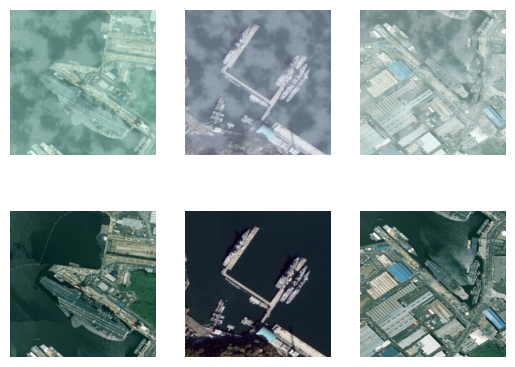

In [ ]:
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

In [ ]:
from keras.engine.data_adapter import data_utils
#Define data
# load and prepare images
data = [src_images, tar_images]

def preprocess_data(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

dataset = preprocess_data(data)

2023-05-12 17:15:28.287107: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 17:15:28.395923: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1621] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31122 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:5e:00.0, compute capability: 7.0


2023-05-12 17:15:30.435992: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1014] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-12 17:15:30.604744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700


1/1 [==============================] - 1s 1s/step


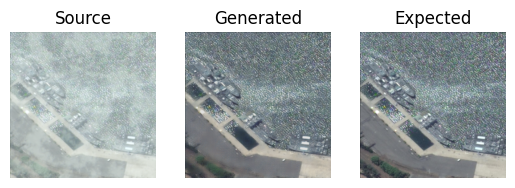

In [ ]:
# testing the model
model = load_model('/workplace/OpticalRemoteSensingClassification/paired_dataset/generator_000100.h5')

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # show title
        pyplot.title(titles[i])
    pyplot.show()

#plot images of dataset
[X1, X2] = dataset
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

#**Saving generated images**

In [ ]:
!mkdir generated
path_cloudy=path+'cloudy/'
file_cloudy=os.listdir(path_cloudy)

In [ ]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
from PIL import Image 
import PIL 
import torch
from tensorflow.keras.utils import array_to_img
#plot images of train dataset
[X1, X2] = dataset

it = randint(0, 1, 1)
for i in file_cloudy:
    src_image = X1[it]
    # generate image from source
    gen_image = model.predict(src_image)
    result = gen_image[0, :, :, :]
    img=array_to_img(result)
    filepath = './generated/'+i
    img=img.save(filepath)
    it[0] = it[0] + 1

1/1 [==============================] - 0s 26ms/step


In [ ]:
#resize generated images in 512*512 as cloudy and cloudless images are also in 512*512 resolution
desired_size = (512, 512)
for filename in os.listdir('./generated'):
      img = Image.open(os.path.join('./generated', filename))
      old_size = img.size
      new_size = desired_size
      new_img = img.resize(new_size)
      new_img.save(os.path.join('./generated', filename))

In [ ]:
!zip -r generated.zip './generated/'
# import shutil
# shutil.copy("generated.zip","/content/drive/MyDrive/NITC_project/")

  adding: generated/ (stored 0%)
  adding: generated/002106.bmp (deflated 17%)
  adding: generated/100000662.bmp (deflated 46%)
  adding: generated/000168.bmp (deflated 37%)
  adding: generated/100001328.bmp (deflated 49%)
  adding: generated/004038.bmp (deflated 39%)
  adding: generated/1465__2984_2218.bmp (deflated 86%)
  adding: generated/100000882.bmp (deflated 30%)
  adding: generated/004135.bmp (deflated 61%)
  adding: generated/100000741.bmp (deflated 25%)
  adding: generated/6dc50c792.bmp (deflated 23%)
  adding: generated/100001665.bmp (deflated 37%)
  adding: generated/1353__0_920.bmp (deflated 98%)
  adding: generated/001832.bmp (deflated 60%)
  adding: generated/100000672.bmp (deflated 43%)
  adding: generated/000373.bmp (deflated 51%)
  adding: generated/003132.bmp (deflated 33%)
  adding: generated/2009__1840_920.bmp (deflated 49%)
  adding: generated/004141.bmp (deflated 34%)
  adding: generated/002524.bmp (deflated 42%)
  adding: generated/2485__1840_1497.bmp (deflated 

'/content/drive/MyDrive/NITC_project/generated.zip'